<a href="https://colab.research.google.com/github/DavideReus99/dataintensive/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsione prezzo di mercato di automobili in base alle caratteristiche**

### **Descrizione del problema**

Vogliamo entrare nel mercato statunitense automobilistico, e il nostro obiettivo è stabilire il prezzo di entrata dei nostri veicoli, in base alle loro caratteristiche.
Si tratta di un problema di regressione, in quanto la variabile da predire è continua.

### **Caricamento librerie**

Carichiamo le librerie necessarie per effettuare operazioni sui dati.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from urllib.request import urlretrieve
import warnings
warnings.filterwarnings("ignore")

### **Caricamento dati**


In [ ]:
dataset_url = "https://github.com/DavideReus99/dataintensive/raw/main/CarPrice_Assignment.csv"
dataset_filename = "CarPrice_Assignment.csv"

if not os.path.exists(dataset_filename):
  urlretrieve(dataset_url, dataset_filename)

data = pd.read_csv(dataset_filename, sep=",")

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### **Analisi esplorativa**

### Informazioni sui dati

In [ ]:
data.shape

(205, 26)

Il dataset contiene 205 istanze, ognuna caratterizzata da 26 feature.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Vediamo un elenco delle feature presenti:

1. 'car_ID': codice identificativo del modello.
2. 'symboling': ?.
3. 'CarName': nome della macchina.
4. 'fueltype': tipo di combustibile.
5. 'aspiration': tipo di aspirazione del motore.
6. 'doornumber': numero di porte.
7. 'carbody': tipo di macchina.
8. 'drivewheel': tipo di trazione.
9. 'enginelocation': posizione del motore.
10. 'wheelbase': passo.
11. 'carlength': lunghezza.
12. 'carwidth': larghezza.
13. 'carheight': altezza.
14. 'curbweight': peso in ordine di marcia.
15. 'enginetype': tipo di motore.
16. 'cylindernumber': numero di cilindri.
17. 'enginesize': dimensione del motore.
18. 'fuelsystem': sistema di alimentazione.
19. 'boreratio': alesaggio.
20. 'stroke': corsa.
21. 'compressionratio': rapporto di compressione.
22. 'horsepower': cavalli.
23. 'peakrpm': giri massimi del motore.
24. 'citympg': mpg (miglia per gallone) in città.
25. 'highwaympg': mpg (miglia per gallone) in autostrada.
26. 'price': prezzo.

Le feature sono sia categoriche che numeriche.

La variabile target è price, ovvero il prezzo della macchina, espresso in dollari.

In [ ]:
data.set_index('car_ID', inplace=True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Poichè la colonna car_ID identifica univocamente i record del dataset, ma non riveste alcuna importanza ai fini della previsione, la assegnamo come indice del dataframe.

In [ ]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Rileviamo le statistiche principali del dataset per ogni feature numerica, ovvero numero elementi, media, massimo, minimo deviazione standard e percentili.

Per esempio, la lunghezza delle macchine presenti varia da 141 a 208 pollici, con una media di 174 pollici.

### **Pulizia dei dati**

La pulizia dei dati è necessaria a fornire al modello una corretta rappresentazione della realtà in esame.

### Gestione dei valori nulli

In [ ]:
data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Osserviamo che non sono presenti valori nulli, per cui non è necessario eliminare righe o inserire valori al posto di quelli nulli.

### Correzione errori e gestione duplicati

Alcuni nomi di marche di automobili sono errati, procediamo a correggerli.

In [ ]:
data['CarName'] = data['CarName'].str.split(' ',expand=True) 
#estraggo il nome della marca di automobili di ogni modello

data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Gli errori presenti sono:


*   alfa-romero = alfa-romeo
*   maxda = mazda
*   Nissan = nissan
*   porcshce = porsche
*   toyouta = toyota
*   vw = vokswagen = volkswagen




In [ ]:
data['CarName'] = data['CarName'].replace({'alfa-romero': 'alfa-romeo', 'maxda': 'mazda',
    'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
    'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
data.duplicated().sum()

0

Non sono presenti istanze duplicate.

### Gestione variabili categoriche

Possiamo osservare che alcune colonne contengono valori di tipo object, per cui conviene trasformarle in variabili categoriche al fine di occupare meno spazio in memoria.

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
  data[col] = data[col].astype('category') 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   CarName           205 non-null    category
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    category
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    category
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

### **Esplorazione dei dati**

### Numero di modelli

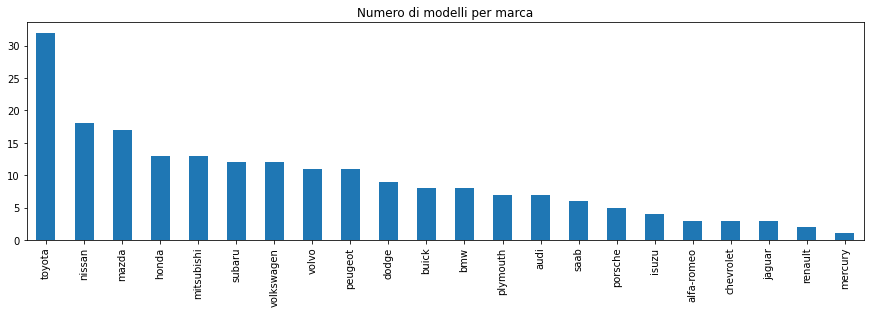

In [ ]:
data["CarName"].value_counts().plot.bar(figsize=(15, 4))
plt.axes().set_title("Numero di modelli per marca");
plt.show()

La marca con più modelli di automobili nel dataset è la Toyota, con più di 30 modelli, mentre la Mercury è quella con meno automobili.

Text(0.5, 1.0, 'Numero di modelli in base alla categoria di automobile')

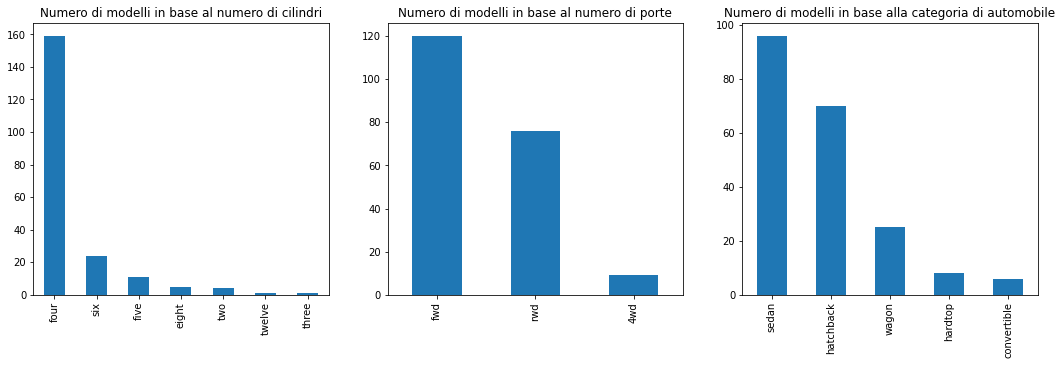

In [ ]:
plt.figure(figsize=(18, 5))

data['cylindernumber'].value_counts().plot.bar(plt.subplot(1,3,1))
plt.title('Numero di modelli in base al numero di cilindri')

data['drivewheel'].value_counts().plot.bar(plt.subplot(1,3,2))
plt.title('Numero di modelli in base al numero di porte')

data['carbody'].value_counts().plot.bar(plt.subplot(1,3,3))
plt.title('Numero di modelli in base alla categoria di automobile')

Osserviamo che la maggior parte delle macchine sono con 4 cilindri, con trazione anteriore o posteriore, e della tipologia sedan o hatchback.

### Distribuzione dei prezzi

Text(0.5, 1.0, 'Distribuzione prezzi')

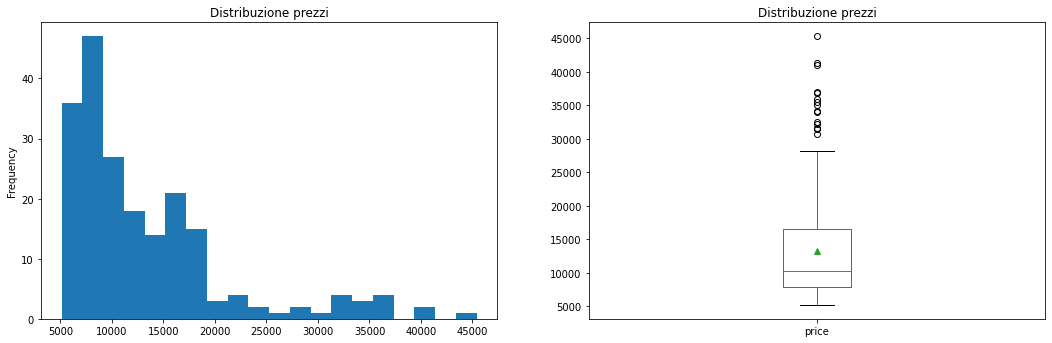

In [ ]:
plt.figure(figsize=(18,12))
data["price"].plot.hist(ax=plt.subplot(2, 2, 1),bins = 20);
plt.title('Distribuzione prezzi')
data["price"].plot.box(ax=plt.subplot(2, 2, 2),showmeans=True)
plt.title('Distribuzione prezzi')

Osserviamo come il range dei prezzi vari dai 5000 ai 45000 dollari, con la maggior parte dei modelli aventi un prezzo compreso tra i 5000 e i 18000 dollari.
Superati i 30000 dollari ci troviamo in presenza di valori outliers, che indicano una concentrazione molto bassa di modelli di vetture con un prezzo maggiore di quella soglia.


### Analisi variabili categoriche

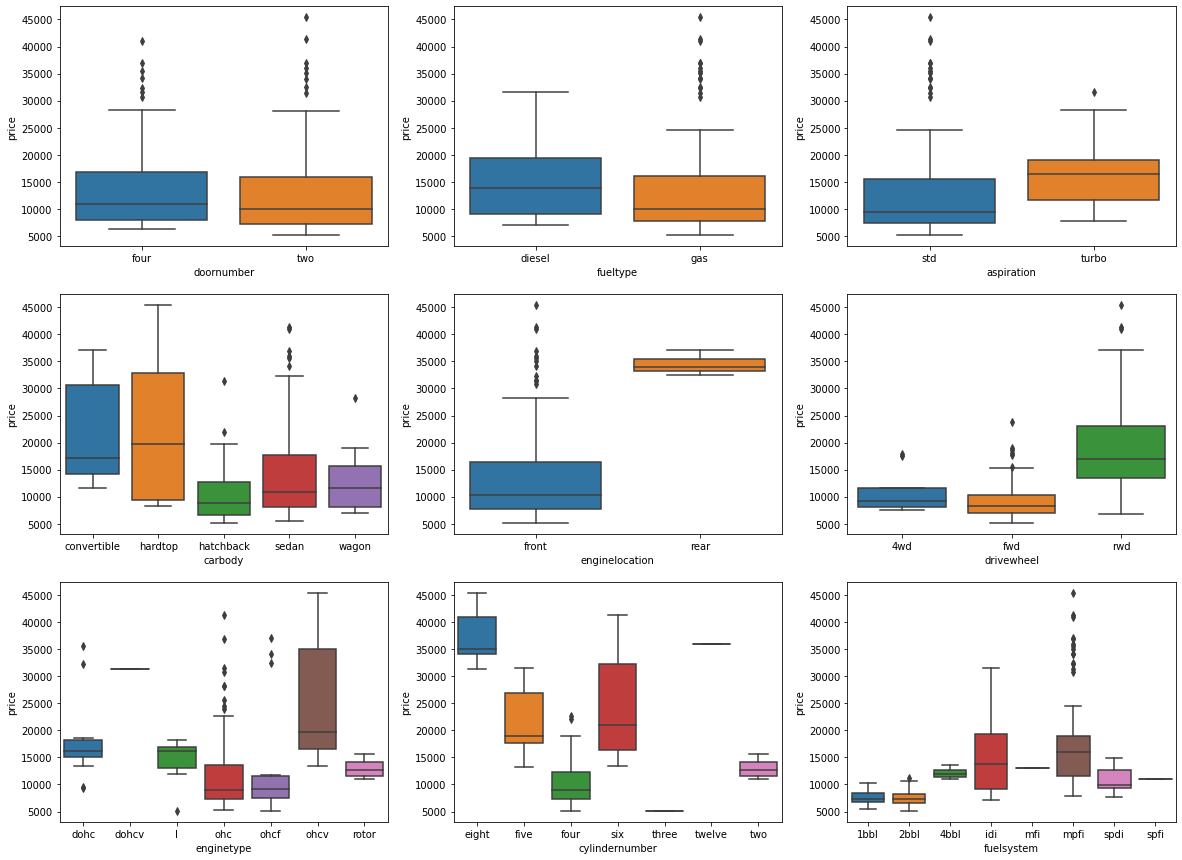

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

Dai seguenti boxplot calcolati sulle variabili categoriche in relazione al prezzo si nota che:


*   Il numero di porte non influenza il prezzo in maniera significativa;
*   Le macchine a diesel hanno in media un prezzo maggiore, ma le macchine con prezzo maggiore, ovvero i valori outliers, sono a benzina;
*   Le macchine aspirate sono generalmente meno costose delle turbocompresse, ma presentano più outliers, quindi le poche macchine più costose sono aspirate;
*   Le cabriolet sono generalmente più costose degli altri tipi, mentre sedan, wagon e hatchback risultano le meno costose;
*   Le macchine con motore in posizione posteriore sono mediamente più costose di quelle con motore anteriore, le quali però sono presenti anche a prezzi alti, come evidenziano gli outliers;
*   Le macchine con trazione anteriore e trazione integrale sono le meno costose, mentre le macchine a trazione posteriore sono più costose;
*   Il numero dei cilindri è direttamente proporzionale al prezzo delle macchine nella maggior parte dei casi, come ci si aspetterebbe.



### Correlazione tra variabili numeriche

In [ ]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

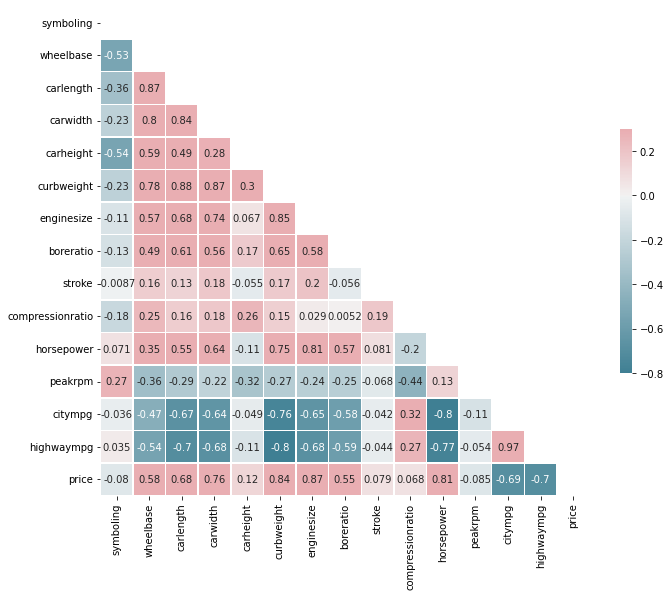

In [ ]:
plot_correlation(data.corr())

Tramite la matrice di correlazione delle features, si evidenziano le seguenti correlazioni rilevanti:


*   Ai fini della correlazione con la variabile target, rivestono un ruolo importante passo, lunghezza, larghezza, peso, dimensione del motore, alesaggio, cavalli, e consumi, mentre symboling, altezza, corsa, rapporto di compressione e picco di giri non sono correlate al prezzo;
*   I cavalli sono direttamente proporzionali alle dimensioni della macchina e del motore, e inversamente proporzionali ai consumi;
*   Le dimensioni sono direttamente correlate tra loro, quindi macchine lunghe tenderanno ad essere anche più larghe ed alte.



### Selezione di feature rilevanti

Dopo l'esplorazione dei dati, possiamo effettuare una prima selezione delle feature più rilevanti ai fini della previsione del prezzo:

* fueltype
* aspiration
* carbody
* drivewheel
* enginelocation
* wheelbase
* carlength
* carwidth
* curbweight
* enginetype
* cylindernumber
* enginesize
* boreratio
* horsepower
* citympg
* highwaympg



In [ ]:
old_data = data.copy()

cols = ['price','enginetype','enginelocation','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

cat_vars = ["enginetype","enginelocation","fueltype","aspiration","carbody","cylindernumber","drivewheel"]
num_vars = ["wheelbase","curbweight","enginesize","boreratio","horsepower","citympg","highwaympg","carlength","carwidth"]

data = data[cols]
data.head()

,price,enginetype,enginelocation,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
car_ID,,,,,,,,,,,,,,,,,
1,13495.0,dohc,front,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500.0,dohc,front,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
3,16500.0,ohcv,front,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
4,13950.0,ohc,front,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
5,17450.0,ohc,front,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


### **Feature preprocessing**

### Importazione librerie

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### Divisione training set e validation set

Utilizzeremo il metodo hold-out per dividere training e validation set.

In [ ]:
X = data.drop(columns="price")
y = data["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

### **Modellazione**

Il nostro obiettivo è ottenere un modello di regressione che permetta di stimare il prezzo di entrata sul mercato di una vettura in base alle sue feature.


### Regressione LASSO

La prima tipologia di regressione che vogliamo testare è la regressione LASSO, in quanto ci permette di eliminare le feature meno importanti ai fini della previsione, e quelle dipendenti dalle altre(multicollinearità).
Per prima cosa effettuiamo una grid search sul parametro alpha della regressione LASSO, in modo da scegliere quello che massimizza lo score del modello, e controlliamo se la standardizzazione delle variabili numeriche influisce nel risultato.

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
      ("numeric", ..., num_vars),
      ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
    ])),
    ("regr" , Lasso())
])
grid = {
    "regr__alpha": [0.1,1,5,10,50],
    "preproc__numeric": ["passthrough", StandardScaler()]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.819950,"{'preproc__numeric': 'passthrough', 'regr__alpha': 0.1}"
1,0.823248,"{'preproc__numeric': 'passthrough', 'regr__alpha': 1}"
2,0.833825,"{'preproc__numeric': 'passthrough', 'regr__alpha': 5}"
3,0.842291,"{'preproc__numeric': 'passthrough', 'regr__alpha': 10}"
4,0.833571,"{'preproc__numeric': 'passthrough', 'regr__alpha': 50}"
5,0.820010,"{'preproc__numeric': StandardScaler(copy=True, with_mean=True, with_std=True), 'regr__alpha': 0.1}"
6,0.823650,"{'preproc__numeric': StandardScaler(copy=True, with_mean=True, with_std=True), 'regr__alpha': 1}"
7,0.835336,"{'preproc__numeric': StandardScaler(copy=True, with_mean=True, with_std=True), 'regr__alpha': 5}"
8,0.845361,"{'preproc__numeric': StandardScaler(copy=True, with_mean=True, with_std=True), 'regr__alpha': 10}"
9,0.834619,"{'preproc__numeric': StandardScaler(copy=True, with_mean=True, with_std=True), 'regr__alpha': 50}"


Il valore 10 risulta il migliore per il parametro alpha, per cui addestreremo il modello con esso.
La standardizzazione delle feature numeriche non influsice in maniera significativa nello score, per cui eviteremo di utilizzarla d'ora in poi.

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", "passthrough", num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars),
    ])),
    ("regr" , Lasso(alpha=10))
])
model.fit(X_train,y_train)
cat_vars_transformed = model.named_steps["preproc"].named_transformers_["categorical"].get_feature_names(cat_vars).tolist()
coefs = pd.Series(model.named_steps["regr"].coef_,index= num_vars + cat_vars_transformed)
coefs


wheelbase                2.474501e+02
curbweight               2.775909e+00
enginesize               5.339376e+01
boreratio               -2.579721e+03
horsepower               2.857851e+01
citympg                  1.353212e+01
highwaympg              -7.296782e+01
carlength               -1.812106e+01
carwidth                 5.643024e+02
enginetype_dohc          0.000000e+00
enginetype_dohcv        -1.630854e+02
enginetype_l            -3.275384e+03
enginetype_ohc           6.115473e+02
enginetype_ohcf          5.220939e+02
enginetype_ohcv         -1.720016e+03
enginetype_rotor         3.016766e+03
enginelocation_front    -1.308139e+04
enginelocation_rear      3.673816e-10
fueltype_diesel         -0.000000e+00
fueltype_gas             0.000000e+00
aspiration_std          -6.690876e+02
aspiration_turbo         0.000000e+00
carbody_convertible      3.219073e+03
carbody_hardtop          1.093441e+03
carbody_hatchback       -1.071509e+03
carbody_sedan           -0.000000e+00
carbody_wago

Possiamo osservare le feature più e meno rilevanti ai fini della previsione.
Per esempio è possibile scartare le colonne citympg, carlength e fueltype.

In [ ]:
cat_vars = ["enginetype","enginelocation","aspiration","carbody","cylindernumber","drivewheel"]
num_vars = ["wheelbase","curbweight","enginesize","boreratio","horsepower","highwaympg","carwidth"]
X = data.drop(columns=["citympg","carlength","fueltype"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

### Regressione Ridge

Testiamo il modello applicando la regolarizzazione L2, per evitare che i coefficienti crescano troppo.

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
      ("numeric", "passthrough", num_vars),
      ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
    ])),
    ("regr" , Ridge())
])
grid = {
    "regr__alpha": [0.01,0.1,1,5,10,100]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.836871,{'regr__alpha': 0.01}
1,0.846839,{'regr__alpha': 0.1}
2,0.859987,{'regr__alpha': 1}
3,0.840321,{'regr__alpha': 5}
4,0.828135,{'regr__alpha': 10}
5,0.805897,{'regr__alpha': 100}


Osserviamo che al variare di alpha, che regola il peso della regolarizzazione, non abbiamo variazioni significanti dello score del modello, segno che la regolarizzazione non è essenziale, per cui un modello di regressione lineare dovrebbe garantire buoni risultati.

La regolarizzazione L2 infatti ha efficacia maggiore se utilizzata per modelli di regressione polinomiale, dove il valore dei coefficienti agli estremi tendere a crescere molto all'aumentare del grado del modello.

### Regressione lineare

In [ ]:
linear = Pipeline([
      ("preproc", ColumnTransformer([
      ("numeric", "passthrough", num_vars),
      ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
    ])),
    ("regr" , LinearRegression())
])
linear.fit(X_train, y_train)
linear.score(X_val,y_val)

0.8455028060856377

Come detto in precedenza, la semplice regressione lineare garantisce buoni risultati se confrontati con la regressione con regolarizzazione.

### Regressione con kernel polinomiale
La regressione polinomiale comporta l'aggiunta di molte variabili, tante più quante sono quelle di input e più è alto il grado del polinomio, andando a peggiorare in maniera esponenziale le performance del modello.

Le funzioni kernel permettono di calcolare gli stessi prodotti della regressione polinomiale senza l'aggiunta di variabili, andando a migliorare significativamente i tempi di calcolo del modello, tenendo conto però che la complessità cresce all'aumentare del numero delle istanze.

Nel nostro caso è la soluzione ideale da testare, in quanto abbiamo un dataset con poche istanze e tante feature.

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", "passthrough", num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="poly"))
])
grid = {
    "regr__degree": range(2, 10),
    "regr__alpha": [0.01, 0.1, 1,5, 10],
}
gs = GridSearchCV(model, grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_val,y_val)

0.8528763597409795

In [ ]:
gs.best_params_

{'regr__alpha': 10, 'regr__degree': 2}

Lo score della regressione con kernel polinomiale è in linea con quanto visto con i metodi di regressione lineare.

Proviamo ora ad applicare la standardizzazione delle feature numeriche.

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="poly"))
])
grid = {
    "regr__degree": range(2, 10),
    "regr__alpha": [0.01, 0.1, 1,5, 10],
}
gs = GridSearchCV(model, grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_val,y_val)

0.898452420021097

In [ ]:
gs.best_params_

{'regr__alpha': 0.1, 'regr__degree': 2}

Vediamo un interessante miglioramento dello score del modello, e un cambiamento del parametro alpha migliore, da 10 a 0.1.

### Regressione con kernel RBF

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="rbf"))
])
grid = {
    "regr__gamma": [0.01, 0.1,1,10],
    "regr__alpha": [0.01, 0.1, 1,5, 10],
}
gs = GridSearchCV(model, grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_val, y_val)


0.9064628777719846

In [ ]:
gs.best_params_

{'regr__alpha': 0.01, 'regr__gamma': 0.01}

La regressione con kernel RBF migliora leggermente lo score rispetto al kernel polinomiale.

Facciamo ora un test considerando il dataset con tutte le feature, per avere una conferma che le feature scartate erano non rilevanti.

In [ ]:
old_X = old_data.drop(columns=["CarName","price"])
old_X_train, old_X_val, y_train, y_val = train_test_split(old_X, y, test_size=1/3, random_state=42)
old_X.columns

old_cat_vars = ["fuelsystem", "enginetype","enginelocation","fueltype","aspiration","carbody","cylindernumber","drivewheel","doornumber"]
old_num_vars = ["stroke","compressionratio","symboling","wheelbase","curbweight","enginesize",
                "boreratio","horsepower","peakrpm","citympg","highwaympg","carlength","carwidth","carheight"]

In [ ]:
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), old_num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), old_cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="rbf"))
])
grid = {
    "regr__gamma": [0.01, 0.1,1,10],
    "regr__alpha": [0.01, 0.1, 1,5, 10],
}
gs = GridSearchCV(model, grid, cv=5)
gs.fit(old_X_train, y_train)
gs.score(old_X_val, y_val)

0.8909330225294537

L'accuratezza del modello rimane pressochè invariata, per cui possiamo stabilire che le feature scartate non erano determinanti ai fini della previsione della variabile target.

### Regressione con alberi decisionali

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  DecisionTreeRegressor(random_state=42))
])
grid = {
    "regr__max_depth": [3, 5, 10, None],
    "regr__min_samples_split": [2, 0.02, 0.05, 0.1]
}
kf = KFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(X_train, y_train)
gs.best_params_

{'regr__max_depth': 3, 'regr__min_samples_split': 0.1}

In [ ]:
gs.score(X_val, y_val)

0.8484083173328367

La regressione con alberi decisionali risulta della stessa efficacia dei modelli di regressione lineari.

### **Valutazione dei modelli migliori**

Andiamo a valutare con attenzione maggiore i modelli che ci hanno fornito lo score migliore.

### Definizione funzioni

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

### Valutazione modelli

Scegliamo di valutare il modello ridge per i modelli lineari, e i due modelli basati sulle funzioni kernel.

In [ ]:
rbf = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="rbf",alpha=0.01,gamma=0.01))
])
rbf.fit(X_train,y_train);

poly = Pipeline([
      ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), num_vars),
        ("categorical", OneHotEncoder(handle_unknown = "ignore"), cat_vars)
      ])),
     ("regr",  KernelRidge(kernel="poly",alpha=0.1,degree=2))
])
poly.fit(X_train,y_train);

In [ ]:
print("Linear model train")
print_eval(X_train, y_train, linear)
print("Linear model val")
print_eval(X_val, y_val, linear)

print("polynomial model train")
print_eval(X_train, y_train, poly)
print("polynomial model val")
print_eval(X_val, y_val, poly)

print("RBF model train")
print_eval(X_train, y_train, rbf)
print("RBF model val")
print_eval(X_val, y_val, rbf)

Linear model train
   Mean squared error: 3.9317e+06
       Relative error: 11.61574%
R-squared coefficient: 0.93696
Linear model val
   Mean squared error: 1.0146e+07
       Relative error: 19.69825%
R-squared coefficient: 0.8455
polynomial model train
   Mean squared error: 2.3783e+06
       Relative error: 9.32830%
R-squared coefficient: 0.96187
polynomial model val
   Mean squared error: 6.6688e+06
       Relative error: 13.91137%
R-squared coefficient: 0.89845
RBF model train
   Mean squared error: 1.8978e+06
       Relative error: 8.56939%
R-squared coefficient: 0.96957
RBF model val
   Mean squared error: 6.1427e+06
       Relative error: 14.44853%
R-squared coefficient: 0.90646


Dai dati si evince come i modelli non lineari siano migliori del modello lineare.
Tutti i modelli presentano un MSE molto elevato, ma questo è comprensibile in quanto è il risultato del quadrato della differenza del prezzo predetto con quello reale, un valore destinato ad essere elevato.
L'errore relativo è abbastanza consistente, ma diminiusce nei modelli non lineari.

Tuttavia, una forbice di errore nel prezzo del 10-15% è da ritenersi accettabile considerando il contesto in cui stiamo lavorando.
Per esempio, dovendo inserire un nuovo modello di automobile nel mercato con un prezzo ideale di 20 mila dollari, un errore del genere garantirebbe un range di selezione del prezzo dai 17/18 ai 22/23 mila dollari, il che sembra ragionevole.

Si notano differenze tra i risultati di training e validation set, e questo fa pensare che il modello possa essere in overfitting, oppure che il training set non sia sufficientemente significativo.
Probabilmente, un dataset più grande avrebbe influito positivamente a riguardo.

### **Interpretazione della conoscenza appresa dal modello**

Andiamo ad interpretare la conoscenza appresa dal modello tramite lo studio dei coefficienti degli iperpiani del modello lineare, in quanto i modelli kernel, nonostante siano più precisi, non sono direttamente interpretabili.

In [ ]:
cat_vars_transformed = linear.named_steps["preproc"].named_transformers_["categorical"].get_feature_names(cat_vars).tolist()
linear_coefs = pd.Series(linear.named_steps["regr"].coef_,index= num_vars + cat_vars_transformed)
linear_coefs

wheelbase                249.612010 
curbweight               3.078891   
enginesize               39.798593  
boreratio               -2637.710893
horsepower               40.181742  
highwaympg              -6.654128   
carwidth                 530.783471 
enginetype_dohc          1417.410537
enginetype_dohcv        -4609.523212
enginetype_l            -1500.553891
enginetype_ohc           2408.552956
enginetype_ohcf          2404.067835
enginetype_ohcv         -1542.985306
enginetype_rotor         1423.031081
enginelocation_front    -6538.122301
enginelocation_rear      6538.122301
aspiration_std          -353.957931 
aspiration_turbo         353.957931 
carbody_convertible      3463.119421
carbody_hardtop          741.303502 
carbody_hatchback       -1211.790084
carbody_sedan           -349.084757 
carbody_wagon           -2643.548082
cylindernumber_eight     6807.919468
cylindernumber_five     -2653.964348
cylindernumber_four     -3964.321210
cylindernumber_six      -2317.716008
c

Il valore che assumono i coefficienti ci permette di interpretare quanto le feature incidano nel modello.

Analizziamo per esempio il numero dei cilindri:
un modello di automobile con un motore a 8 cilindri subirà un incremento del prezzo di quasi 7000 dollari rispetto al valore di partenza del prezzo fornito dal modello.

Feature come curbweight hanno un coefficiente molto basso, ma esso va moltiplicato per il peso espresso in libbre, risultando quindi in un incremento consistente rispetto al prezzo di partenza.

In [ ]:
linear.named_steps["regr"].intercept_

-45380.3787173003

Il prezzo di partenza del modello assume un valore molto negativo.
Questo fa capire che ci sono feature che inevitabilmente andranno a portare il valore del prezzo in positivo, come ad esempio i cavalli, la larghezza della macchina, il passo, eccetera.

### **Conclusioni**

Abbiamo visto come sia possibile addestrare un modello di regressione per determinare il prezzo di mercato di un modello di automobile, basandoci sulle caratteristiche dei modelli già presenti nel listino, ottenendo buoni risultati in termini di efficacia, precisione e coerenza con la realtà del dominio applicativo.